In [317]:
# import packages

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import numpy as np
# import scipy.stats as stats

from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import eli5

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [318]:
# import data

data = pd.read_csv('data/kc_house_data.csv')

In [319]:
# Column Names and descriptions for King County Data Set

# * **id** - unique identified for a house
# * **date** - house was sold
# * **price** -  is prediction target
# * **bedrooms** -  of Bedrooms/House
# * **bathrooms** -  of bathrooms/bedrooms
# * **sqft_living** -  footage of the home
# * **sqft_lot** -  footage of the lot
# * **floors** -  floors (levels) in house
# * **waterfront** - House which has a view to a waterfront
# * **view** - Has been viewed
# * **condition** - How good the condition is ( Overall )
# * **grade** - overall grade given to the housing unit, based on King County grading system
# * **sqft_above** - square footage of house apart from basement
# * **sqft_basement** - square footage of the basement
# * **yr_built** - Built Year
# * **yr_renovated** - Year when house was renovated
# * **zipcode** - zip
# * **lat** - Latitude coordinate
# * **long** - Longitude coordinate
# * **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
# * **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [320]:
# stakeholder: real estate agent who wants to sell homes
# Agent needs to explain to sellers what their homes will sell for, how to price them
# price will be target variable

In [321]:
# explore data

data.head()
data.info()
data.describe()

# questions and observations:
# high outliers in price, bedrooms, bathrooms, sqft_living, sqft_lot, & grade
# null values in waterfront, view, yr_renovated
# waterfront has lots of 0s
# turn date (sale date) into a date
# turn sqft_basement into a float (but noticed it has some non-number values, like ?)
# view (number of times house has been viewed), lat, and long are probably not relevant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,19221.00000,21534.00000,21597.00000,21597.00000,21597.00000,21597.00000,17755.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000
mean,4580474287.77099,540296.57351,3.37320,2.11583,2080.32185,15099.40876,1.49410,0.00760,0.23386,3.40983,7.65792,1788.59684,1970.99968,83.63678,98077.95185,47.56009,-122.21398,1986.62032,12758.28351
std,2876735715.74778,367368.14010,0.92630,0.76898,918.10613,41412.63688,0.53968,0.08682,0.76569,0.65055,1.17320,827.75976,29.37523,399.94641,53.51307,0.13855,0.14072,685.23047,27274.44195
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049175.00000,322000.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,1951.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23100,1840.00000,7620.00000
75%,7308900490.00000,645000.00000,4.00000,2.50000,2550.00000,10685.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


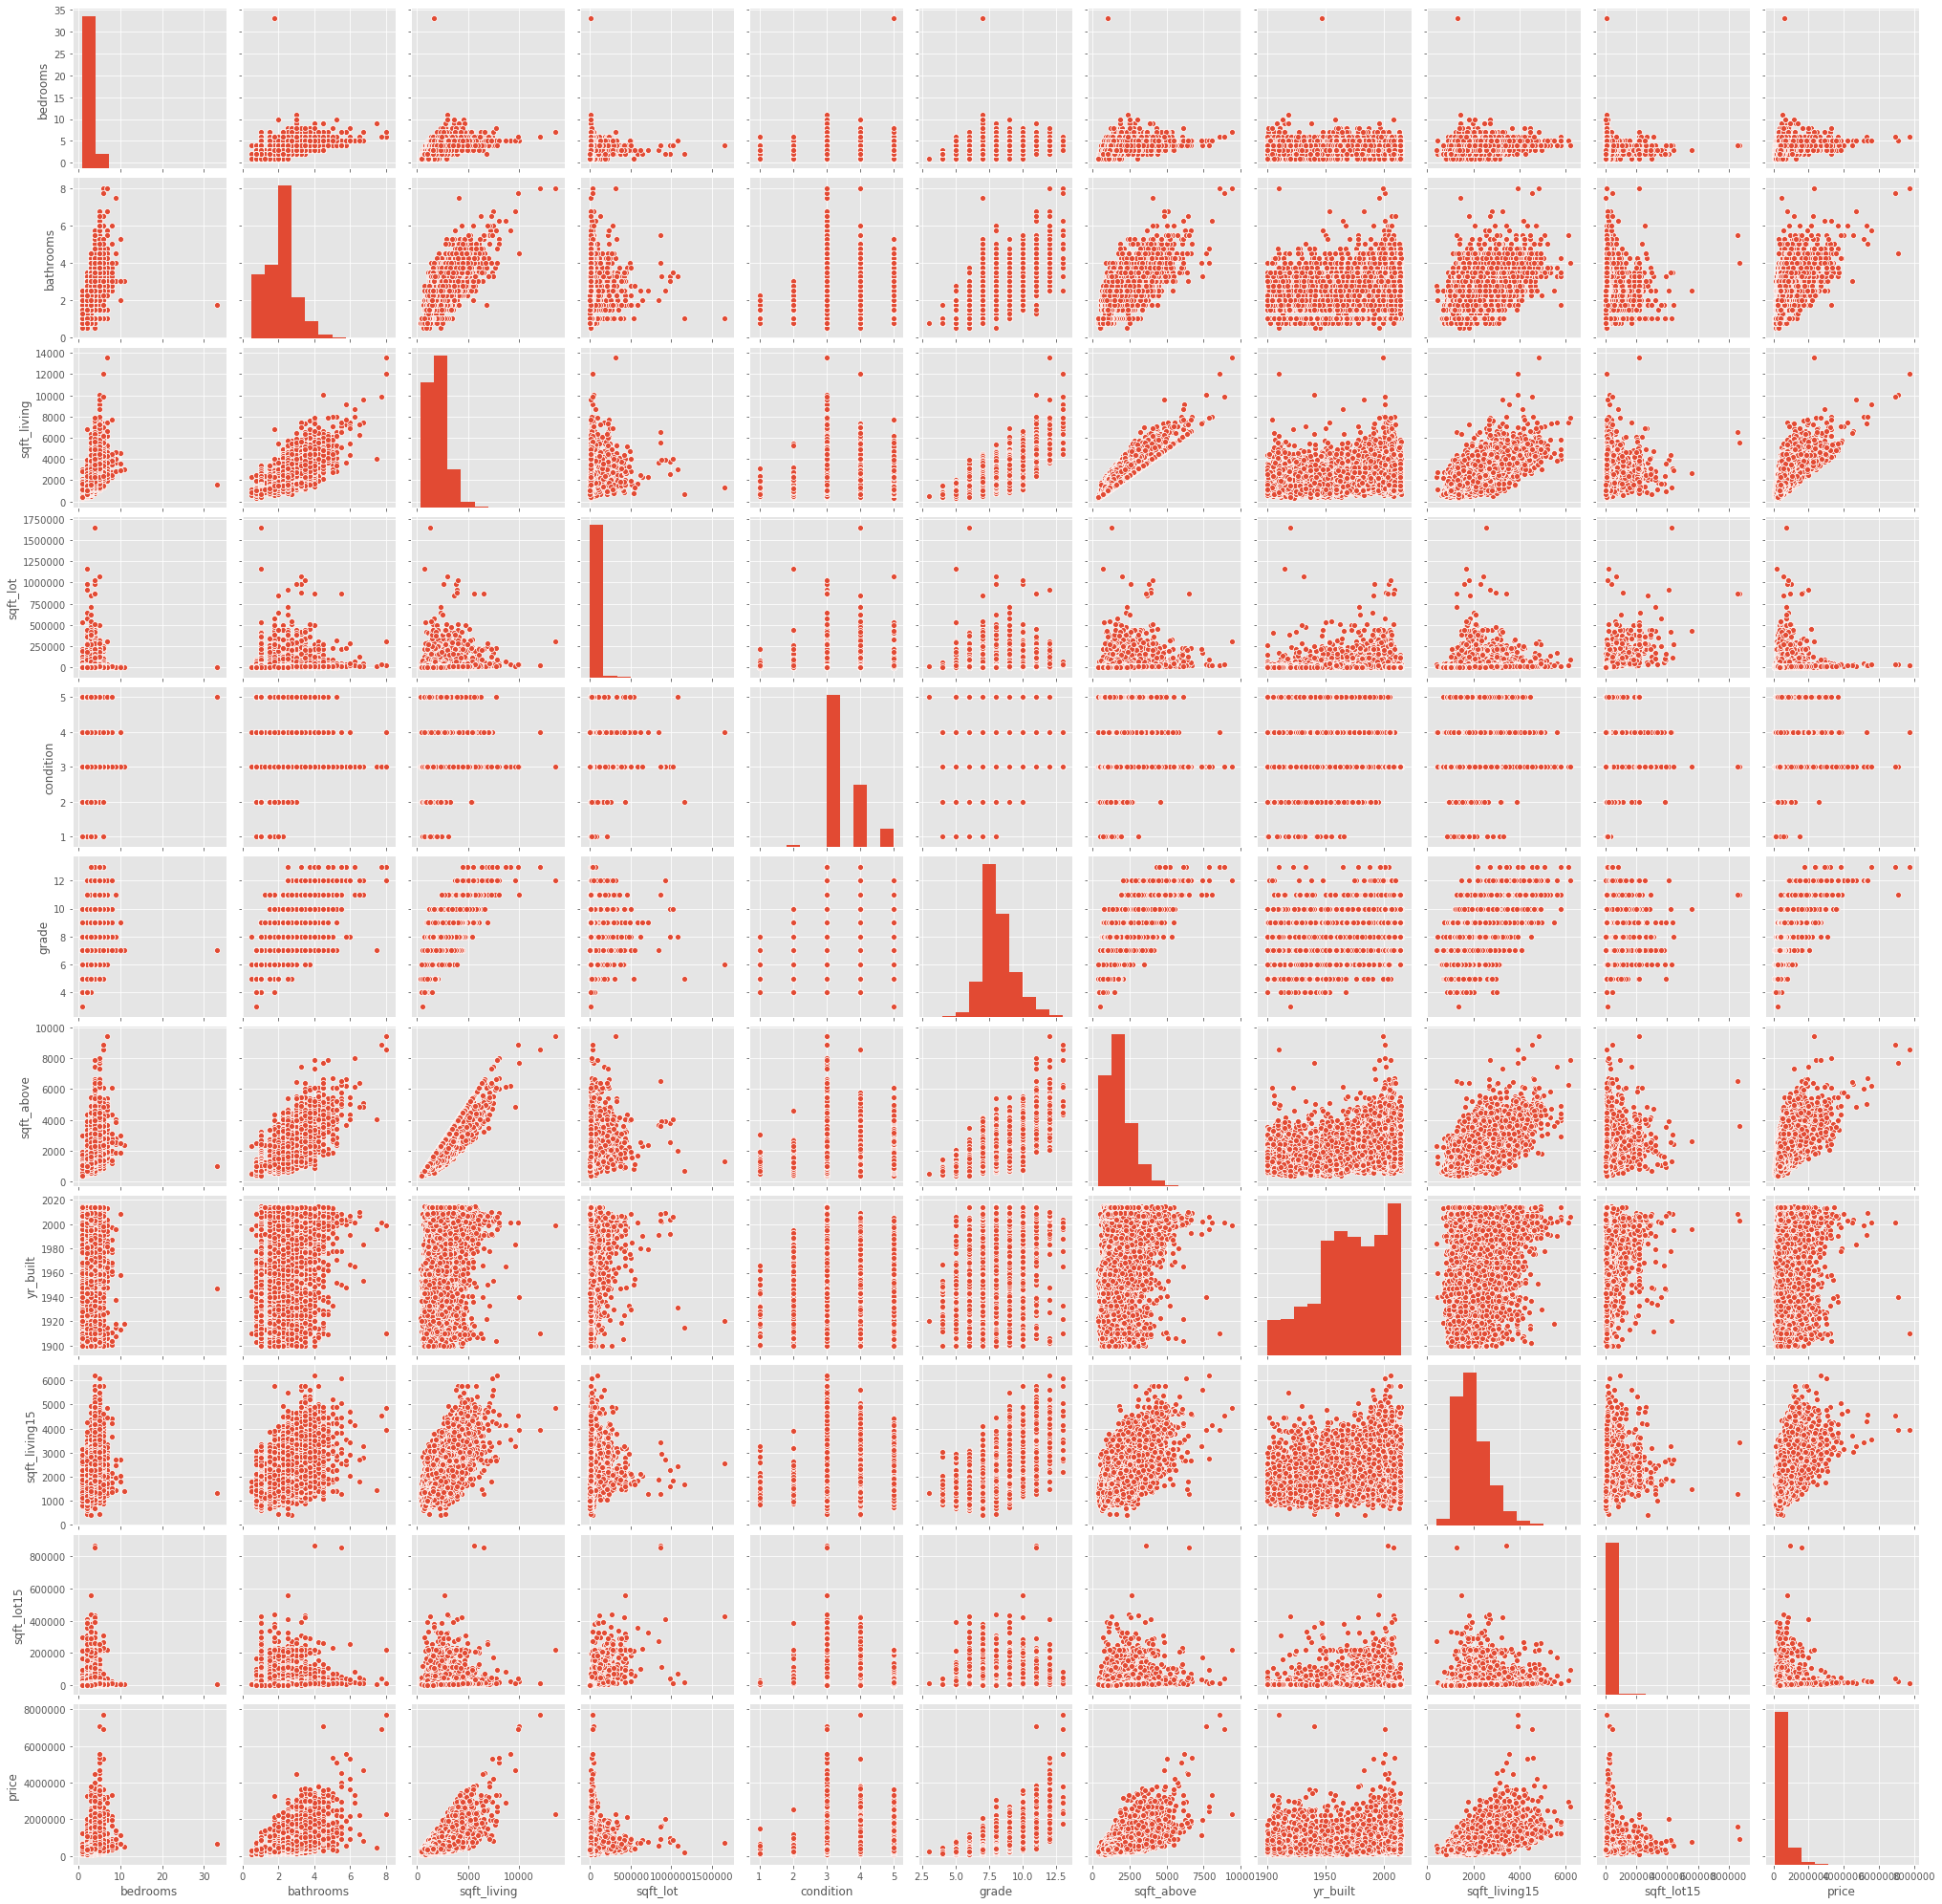

In [322]:
# explore data
# let's try a pairplot to see if anything stands out

cols_of_interest = [ 
                    'bedrooms', 
                    'bathrooms', 
                    'sqft_living',
                    'sqft_lot', 
                    'condition', 
                    'grade', 
                    'sqft_above',
                    'yr_built',  
                    'sqft_living15', 
                    'sqft_lot15',
                    'price']

sns.pairplot(data[cols_of_interest]);

# strongest correlations with price appear to be sqft_living, sqft_above, sqft_living15, grade, bathrooms
# strong correlations between X variables are among these same columns
# all five are correlated with each other
# this multicollinearity could be problematic

# nothing looks normally distributed except maybe grade and bedrooms
# bathrooms, sqft_living, sqft_above, sqft_living15 may be approaching a normal distribution

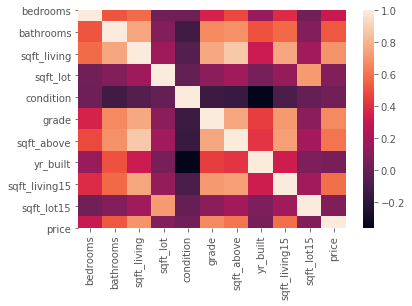

In [323]:
# let's make a heatmap to be sure

sns.heatmap(data[cols_of_interest].corr())

# yes, confirms the observations above

In [324]:
# let's look at the numbers

data[cols_of_interest].corr()

# sqft_living is the best predictor of price so far

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,price
bedrooms,1.00000,0.51451,0.57821,0.03247,0.02650,0.35656,0.47939,0.15567,0.39341,0.03069,0.30879
bathrooms,0.51451,1.00000,0.75576,0.08837,-0.12648,0.66584,0.68667,0.50717,0.56988,0.08830,0.52591
sqft_living,0.57821,0.75576,1.00000,0.17345,-0.05944,0.76278,0.87645,0.31815,0.75640,0.18434,0.70192
sqft_lot,0.03247,0.08837,0.17345,1.00000,-0.00883,0.11473,0.18414,0.05295,0.14476,0.71820,0.08988
condition,0.02650,-0.12648,-0.05944,-0.00883,1.00000,-0.14690,-0.15890,-0.36159,-0.09307,-0.00313,0.03606
grade,0.35656,0.66584,0.76278,0.11473,-0.14690,1.00000,0.75607,0.44787,0.71387,0.12098,0.66795
sqft_above,0.47939,0.68667,0.87645,0.18414,-0.15890,0.75607,1.00000,0.42404,0.73177,0.19508,0.60537
yr_built,0.15567,0.50717,0.31815,0.05295,-0.36159,0.44787,0.42404,1.00000,0.32638,0.07078,0.05395
sqft_living15,0.39341,0.56988,0.75640,0.14476,-0.09307,0.71387,0.73177,0.32638,1.00000,0.18352,0.58524
sqft_lot15,0.03069,0.08830,0.18434,0.71820,-0.00313,0.12098,0.19508,0.07078,0.18352,1.00000,0.08284


In [325]:
# let's look just at the correlations with price

data[cols_of_interest].corr()['price'].sort_values(ascending=False)

# interesting, sqft_living is further above the rest than I thought

price           1.00000
sqft_living     0.70192
grade           0.66795
sqft_above      0.60537
sqft_living15   0.58524
bathrooms       0.52591
bedrooms        0.30879
sqft_lot        0.08988
sqft_lot15      0.08284
yr_built        0.05395
condition       0.03606
Name: price, dtype: float64

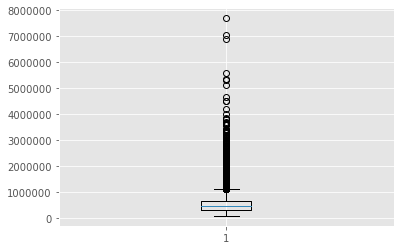

In [326]:
# investigate price outliers
plt.boxplot(data['price']); # looks like outliers are probably accurate

In [327]:
# investigate price outliers

data_price_outliers = data.loc[data.price > 1200000].sort_values(by='price', ascending=False)
data_price_outliers.head(500)
# data_price_outliers.describe()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.00000,6,8.00000,12050,27600,2.50000,0.00000,3.00000,4,13,8570,3480.0,1910,1987.00000,98102,47.62980,-122.32300,3940,8800
3910,9808700762,6/11/2014,7060000.00000,5,4.50000,10040,37325,2.00000,1.00000,2.00000,3,11,7680,2360.0,1940,2001.00000,98004,47.65000,-122.21400,3930,25449
9245,9208900037,9/19/2014,6890000.00000,6,7.75000,9890,31374,2.00000,0.00000,4.00000,3,13,8860,1030.0,2001,0.00000,98039,47.63050,-122.24000,4540,42730
4407,2470100110,8/4/2014,5570000.00000,5,5.75000,9200,35069,2.00000,0.00000,0.00000,3,13,6200,3000.0,2001,nan,98039,47.62890,-122.23300,3560,24345
1446,8907500070,4/13/2015,5350000.00000,5,5.00000,8000,23985,2.00000,0.00000,4.00000,3,12,6720,1280.0,2009,0.00000,98004,47.62320,-122.22000,4600,21750
1313,7558700030,4/13/2015,5300000.00000,6,6.00000,7390,24829,2.00000,1.00000,nan,4,12,5000,2390.0,1991,0.00000,98040,47.56310,-122.21000,4320,24619
1162,1247600105,10/20/2014,5110000.00000,5,5.25000,8010,45517,2.00000,1.00000,4.00000,3,12,5990,2020.0,1999,0.00000,98033,47.67670,-122.21100,3430,26788
8085,1924059029,6/17/2014,4670000.00000,5,6.75000,9640,13068,1.00000,1.00000,4.00000,3,12,4820,4820.0,1983,2009.00000,98040,47.55700,-122.21000,3270,10454
2624,7738500731,8/15/2014,4500000.00000,5,5.50000,6640,40014,2.00000,1.00000,4.00000,3,12,6350,290.0,2004,0.00000,98155,47.74930,-122.28000,3030,23408
8629,3835500195,6/18/2014,4490000.00000,4,3.00000,6430,27517,2.00000,0.00000,0.00000,3,12,6430,0.0,2001,0.00000,98004,47.62080,-122.21900,3720,14592


In [328]:
# try a cut-off of $3.5 million - cuts off the top 20 sales
data = data.loc[data['price'] < 3250000]


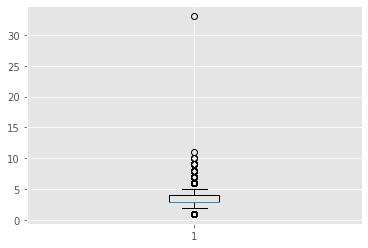

In [329]:
# looks like max values for price, bathrooms, sqft_living & grade are accurate
# what about bedrooms (33?) and sqft_lot
# investigate bedrooms outliers

plt.boxplot(data.bedrooms); # looks like there may be at least 1 inaccurate outlier

In [330]:
# investigate bedrooms outliers

data_br_outliers = data.loc[data.bedrooms > 5].sort_values(by='bedrooms', ascending=False)
data_br_outliers.head(20)

# looks like 33 bedrooms is an outlier due to small sqft_living and number of bathrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.00000,33,1.75000,1620,6000,1.00000,0.00000,0.00000,5,7,1040,580.0,1947,0.00000,98103,47.68780,-122.33100,1330,4700
8748,1773100755,8/21/2014,520000.00000,11,3.00000,3000,4960,2.00000,0.00000,0.00000,3,7,2400,600.0,1918,1999.00000,98106,47.55600,-122.36300,1420,4960
19239,8812401450,12/29/2014,660000.00000,10,3.00000,2920,3745,2.00000,0.00000,0.00000,4,7,1860,1060.0,1913,0.00000,98105,47.66350,-122.32000,1810,3745
13301,627300145,8/14/2014,1150000.00000,10,5.25000,4590,10920,1.00000,0.00000,2.00000,3,9,2500,2090.0,2008,0.00000,98004,47.58610,-122.11300,2730,10400
15147,5566100170,10/29/2014,650000.00000,10,2.00000,3610,11914,2.00000,0.00000,0.00000,4,7,3010,600.0,1958,0.00000,98006,47.57050,-122.17500,2040,11914
8537,424049043,8/11/2014,450000.00000,9,7.50000,4050,6504,2.00000,0.00000,0.00000,3,7,4050,0.0,1996,0.00000,98144,47.59230,-122.30100,1448,3866
16830,8823900290,3/17/2015,1400000.00000,9,4.00000,4620,5508,2.50000,0.00000,0.00000,3,11,3870,750.0,1915,0.00000,98105,47.66840,-122.30900,2710,4320
4092,1997200215,5/7/2014,599999.00000,9,4.50000,3830,6988,2.50000,0.00000,0.00000,3,7,2450,1380.0,1938,0.00000,98103,47.69270,-122.33800,1460,6291
4231,2902200015,1/6/2015,700000.00000,9,3.00000,3680,4400,2.00000,0.00000,0.00000,3,7,2830,850.0,1908,0.00000,98102,47.63740,-122.32400,1960,2450
18428,8823901445,3/13/2015,934000.00000,9,3.00000,2820,4480,2.00000,0.00000,0.00000,3,7,1880,940.0,1918,0.00000,98105,47.66540,-122.30700,2460,4400


In [331]:
# let's drop the row with 33 bedrooms

data = data.loc[data.bedrooms < 33]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21564 entries, 0 to 21596
Data columns (total 21 columns):
id               21564 non-null int64
date             21564 non-null object
price            21564 non-null float64
bedrooms         21564 non-null int64
bathrooms        21564 non-null float64
sqft_living      21564 non-null int64
sqft_lot         21564 non-null int64
floors           21564 non-null float64
waterfront       19188 non-null float64
view             21502 non-null float64
condition        21564 non-null int64
grade            21564 non-null int64
sqft_above       21564 non-null int64
sqft_basement    21564 non-null object
yr_built         21564 non-null int64
yr_renovated     17725 non-null float64
zipcode          21564 non-null int64
lat              21564 non-null float64
long             21564 non-null float64
sqft_living15    21564 non-null int64
sqft_lot15       21564 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


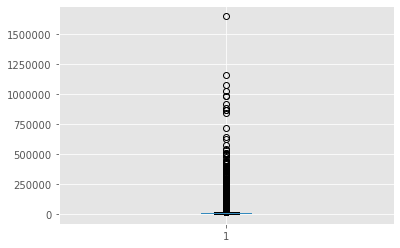

In [332]:
# investigate sqft_lot outliers

plt.boxplot(data.sqft_lot); # hard to say if the max value is inaccurate, let's look at it

In [333]:
# investigate sqft_lot outliers

data_lot_outliers = data.loc[data.sqft_lot > 500000].sort_values(by='sqft_lot', ascending=False)
data_lot_outliers.head(500)
# looks accurate.  checked out the first 3 zip codes and they are rural areas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.00000,4,1.00000,1300,1651359,1.00000,0.00000,3.00000,4,6,1300,0.0,1920,0.00000,98022,47.23130,-122.02300,2560,425581
17305,3326079016,5/4/2015,190000.00000,2,1.00000,710,1164794,1.00000,0.00000,0.00000,2,5,710,0.0,1915,0.00000,98014,47.68880,-121.90900,1680,16730
7640,2623069031,5/21/2014,542500.00000,5,3.25000,3010,1074218,1.50000,nan,0.00000,5,8,2010,1000.0,1931,0.00000,98027,47.45640,-122.00400,2450,68825
7762,2323089009,1/19/2015,855000.00000,4,3.50000,4030,1024068,2.00000,0.00000,0.00000,3,10,4030,0.0,2006,0.00000,98045,47.46190,-121.74400,1830,11700
3945,722069232,9/5/2014,998000.00000,4,3.25000,3770,982998,2.00000,0.00000,0.00000,3,10,3770,0.0,1992,0.00000,98058,47.41400,-122.08700,2290,37141
4437,3626079040,7/30/2014,790000.00000,2,3.00000,2560,982278,1.00000,0.00000,0.00000,3,8,2560,0.0,2004,0.00000,98014,47.69550,-121.86100,1620,40946
6685,2624089007,3/20/2015,2000000.00000,2,2.50000,3900,920423,2.00000,0.00000,0.00000,3,12,3900,0.0,2009,0.00000,98065,47.53710,-121.75600,2720,411962
7070,2724079090,1/5/2015,1650000.00000,4,3.25000,3920,881654,3.00000,nan,3.00000,3,11,3920,?,2002,nan,98024,47.53850,-121.89600,2970,112384
9705,225079036,1/7/2015,937500.00000,4,4.00000,5545,871200,2.00000,0.00000,0.00000,3,11,3605,1940.0,2003,0.00000,98014,47.67600,-121.88200,3420,871200
20436,1125079111,4/15/2015,1600000.00000,4,5.50000,6530,871200,2.00000,0.00000,2.00000,3,11,6530,0.0,2008,0.00000,98014,47.66400,-121.87800,1280,858132


In [334]:
# investigate null values in waterfront

data.waterfront.value_counts() # binary - 1 or 0
data.waterfront.isna().sum() #2376 null values out of 21596
data.waterfront.value_counts() 

# I'm reluctant to drop the rows, which are > 10% of the data
# Only 146 homes are marked as waterfront -- less than 1% of data
# So I'll drop this feature from the analysis

0.00000    19057
1.00000      131
Name: waterfront, dtype: int64

In [335]:
# deal with null values in yr_renovated

data['yr_renovated'].value_counts().head(50)
# 17010 values are 0
# nulls = data['yr_renovated'].isna().sum() #3842 values are null
# many of the values with years are old, e.g. 1930's-1990's

0.00000       16987
2014.00000       73
2003.00000       31
2013.00000       31
2007.00000       30
2005.00000       29
2000.00000       29
1990.00000       22
2004.00000       22
2009.00000       20
1989.00000       20
2006.00000       20
1991.00000       16
1998.00000       16
1984.00000       16
2002.00000       16
1999.00000       15
2008.00000       15
1983.00000       15
2015.00000       14
2001.00000       14
2010.00000       14
1985.00000       14
1986.00000       14
1994.00000       14
1992.00000       13
1993.00000       12
1987.00000       12
1997.00000       12
1995.00000       12
1996.00000       11
1988.00000       11
2011.00000        9
1970.00000        9
1982.00000        8
1980.00000        8
2012.00000        8
1968.00000        7
1979.00000        7
1977.00000        7
1964.00000        5
1975.00000        5
1969.00000        4
1981.00000        4
1963.00000        4
1965.00000        4
1973.00000        4
1978.00000        3
1972.00000        3
1955.00000        3


In [336]:
# create a new column showing homes renovated or not

data['renovated'] = np.where(data['yr_renovated'] > 0, 1, 0)
data['renovated'].value_counts() # only 744 homes show a year renovated

0    20826
1      738
Name: renovated, dtype: int64

In [337]:
# deal with non-number values in sqft_basement
data['sqft_basement'].value_counts() # continuous variable, but has 454 '?' values
# also 12826 0 values.  Do these homes truly not have basements?

# per cent of data that is missing:
missing_sqft_basement = round((len(data.loc[data['sqft_basement'] == '?'])/len(data))*100, 2)
print(missing_sqft_basement, "% of basement data is missing")

# per cent of data that is zero:
missing_sqft_basement = round((len(data.loc[data['sqft_basement'] == '0.0'])/len(data))*100, 2)
print(missing_sqft_basement, "% of basement data is zero")

2.1 % of basement data is missing
59.46 % of basement data is zero


In [338]:
# for now, let's fill missing values with zero, since that's the median
# probably this data will not be a predictor, but let's check

#replace all '?' values with '0'
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = '0'

data['sqft_basement'].value_counts().head(20)

0.0       12821
0           453
600.0       216
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
Name: sqft_basement, dtype: int64

In [339]:
# now convert sqft_basement values to integers

data['sqft_basement'] = pd.to_numeric(data['sqft_basement'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21564 entries, 0 to 21596
Data columns (total 22 columns):
id               21564 non-null int64
date             21564 non-null object
price            21564 non-null float64
bedrooms         21564 non-null int64
bathrooms        21564 non-null float64
sqft_living      21564 non-null int64
sqft_lot         21564 non-null int64
floors           21564 non-null float64
waterfront       19188 non-null float64
view             21502 non-null float64
condition        21564 non-null int64
grade            21564 non-null int64
sqft_above       21564 non-null int64
sqft_basement    21564 non-null float64
yr_built         21564 non-null int64
yr_renovated     17725 non-null float64
zipcode          21564 non-null int64
lat              21564 non-null float64
long             21564 non-null float64
sqft_living15    21564 non-null int64
sqft_lot15       21564 non-null int64
renovated        21564 non-null int64
dtypes: float64(9), int64(12), objec

In [340]:
# let's make a baseline model
# let's review the columns to see which we can include in a baseline model

list(data.columns)

# columns to exclude:
# 'id', 'date', 'waterfront', 'view', 'yr_renovated', 'lat', 'long'

# justification for column exclusion:
# id - the randomly assigned row id
# date - date sold, all are in 2014 or 2015.  May investigate impact of month later
# waterfront - less than 1% of homes marked as waterfront
# view - number of times the home has been viewed - not relevant for pricing homes newly on the market
# yr_renovated - missing values.  Turned into binary column 'renovated'
# 'lat' and 'long' - latitude and longitude of house - easier to pull neighborhood with zipcode

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'renovated']

In [341]:
# first, split into test and training sets

from sklearn.model_selection import train_test_split

# including relevant columns:

X=data[['bedrooms', 
       'bathrooms', 
       'sqft_living', 
       'sqft_lot', 
       'floors', 
       'condition', 
       'grade',
       'sqft_above', 
       'sqft_basement', 
       'yr_built', 
       'zipcode',
       'sqft_living15', 
       'sqft_lot15', 
       'renovated']]

y=data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15094 6470 15094 6470


In [342]:
# for our first model-less baseline, let's use the mean price
# start with training set

mean_price = y_train.mean()
y_pred_train = np.full(shape=(len(X_train), 1), fill_value=mean_price)

# check r2
from sklearn.metrics import r2_score
r2_baseline_train = round(r2_score(y_true=y_train, y_pred=y_pred_train), 6)

# check Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae_baseline_train = round(mean_absolute_error(y_true=y_train, y_pred=y_pred_train), 2)

# check Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse_baseline_train = round(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)), 2)

print('Training Data', '\n', 
      'Mean Price:', round(mean_price, 2), '\n', 
      'R-Squared:', r2_baseline_train, '\n',
      'Mean Absolute Error:', mae_baseline_train, '\n',
      'Root Mean Squared Error:', rmse_baseline_train)

Training Data 
 Mean Price: 537250.03 
 R-Squared: 0.0 
 Mean Absolute Error: 229795.19 
 Root Mean Squared Error: 340631.29


In [343]:
# now let's calculate baseline r2, MAE, and RMSE for the test set

y_pred_test = np.full(shape=(len(X_test), 1), fill_value=mean_price)

r2_baseline_test = round(r2_score(y_true=y_test, y_pred=y_pred_test), 6)

mae_baseline_test = round(mean_absolute_error(y_true=y_test, y_pred=y_pred_test), 2)

rmse_baseline_test = round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)), 2)

print('Testing Data', '\n', 
      'Mean Price:', round(mean_price, 2), '\n', 
      'R-Squared:', r2_baseline_test, '\n',
      'Mean Absolute Error:', mae_baseline_test, '\n',
      'Root Mean Squared Error:', rmse_baseline_test)

Testing Data 
 Mean Price: 537250.03 
 R-Squared: -0.000618 
 Mean Absolute Error: 224221.98 
 Root Mean Squared Error: 325342.64


In [344]:
# create a function for evaluating models:

def evaluate_model(y_train, y_train_pred, y_test, y_test_pred):

    # check train r2
    r2_train = round(r2_score(y_true=y_train, y_pred=y_train_pred), 6)

    # check train Mean Absolute Error
    from sklearn.metrics import mean_absolute_error
    mae_train = round(mean_absolute_error(y_true=y_train, y_pred=y_train_pred), 2)

    # check train Root Mean Squared Error
    rmse_train = round(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred)), 2)

    print('Training Data', '\n', 
          'R-Squared:', r2_train, '\n',
          'Mean Absolute Error:', mae_train, '\n',
          'Root Mean Squared Error:', rmse_train, '\n')
    
    # check test r2
    r2_test = round(r2_score(y_true=y_test, y_pred=y_test_pred), 6)

    # check test Mean Absolute Error
    mae_test = round(mean_absolute_error(y_true=y_test, y_pred=y_test_pred), 2)

    # check train Root Mean Squared Error
    rmse_test = round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred)), 2)

    print('Testing Data', '\n', 
          'R-Squared:', r2_test, '\n',
          'Mean Absolute Error:', mae_test, '\n',
          'Root Mean Squared Error:', rmse_test)

In [345]:
# the mean is not a good predictor of price!

# let's fit a baseline regression model

# let's scale the data so we can evaluate a baseline model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [346]:
# now do a linear regression

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_train_pred2 = linreg.predict(X_train_scaled)
y_test_pred2 = linreg.predict(X_test_scaled)

evaluate_model(y_train, y_train_pred2, y_test, y_test_pred2)

Training Data 
 R-Squared: 0.63127 
 Mean Absolute Error: 138015.86 
 Root Mean Squared Error: 206841.99 

Testing Data 
 R-Squared: 0.628868 
 Mean Absolute Error: 136007.71 
 Root Mean Squared Error: 198139.37


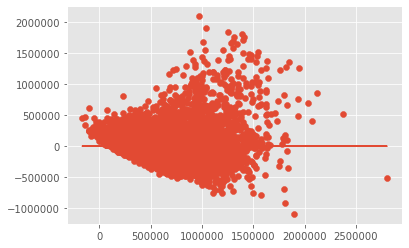

In [347]:
# that's better, but the model still only explains about 60% of the variance
# let's plot training set residuals

residuals = y_train-y_train_pred2
plt.scatter(y_train_pred2, residuals)
plt.plot(y_train_pred2, [0 for i in range(len(y_train_pred2))])

# cone-shaped fit indicates heteroskedasticity

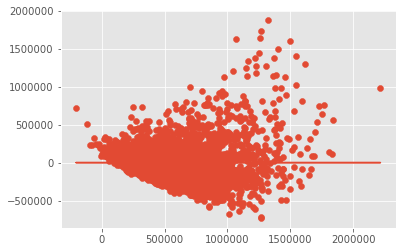

In [348]:
# let's plot test set residuals

residuals2 = y_test-y_test_pred2
plt.scatter(y_test_pred2, residuals2)
plt.plot(y_test_pred2, [0 for i in range(len(y_test_pred2))])

# cone-shaped fit indicates heteroskedasticity

In [349]:
# let's look at coefficients

eli5.show_weights(linreg, feature_names=list(X.columns))

Weight?,Feature
+537250.028,<BIAS>
+150438.367,grade
+99650.597,sqft_living
+41650.698,sqft_living15
+33293.596,bathrooms
+23606.976,floors
+22446.728,sqft_basement
+16211.220,condition
+7604.252,renovated
+7397.521,sqft_above


In [350]:
# run it in Statsmodels to double check

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)))
results = model.fit()

results.summary()

# yes, results are the same as above

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1844.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:00:56   Log-Likelihood:            -2.0616e+05
No. Observations:               15094   AIC:                         4.124e+05
Df Residuals:                   15079   BIC:                         4.125e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.373e+05   1684.428    318.951      0.000    5.34e+05    5.41e+05
bedrooms       -3.58e+04   2198.244    -16.285      0.000   -4.01e+04   -3.15e+04
bathrooms      3.329e+04   3063.575     10.868      0.000    2.73e+04    3.93e+04
sqft_living    9.965e+04    2.1e+04      4.737      0.000    5.84e+04    1.41e+05
sqft_lot       1697.7574   2453.650      0.692      0.489   -3111.694    6507.209
floors         2.361e+04   2375.073      9.939      0.000     1.9e+04    2.83e+04
condition      1.621e+04   1870.545      8.667      0.000    1.25e+04    1.99e+04
grade          1.504e+05   3018.925     49.832      0.000    1.45e+05    1.56e+05
sqft_above     7397.5212    1.9e+04      0.389      0.697   -2.98e+04    4.46e+04
sqft_basement  2.245e+04   1.01e+04      2.229      0.026    2710.971    4.22e+04
yr_built      -1.086e+05   2463.032    -44.096      0.000   -1.13e+05   -1.04e+05
zipcode        6448.7556   1912.926      3.371      0.001    2699.188    1.02e+04
sqft_living15  4.165e+04   2846.025     14.635      0.000    3.61e+04    4.72e+04
sqft_lot15    -1.076e+04   2462.989     -4.369      0.000   -1.56e+04   -5932.446
renovated      7604.2525   1762.209      4.315      0.000    4150.109    1.11e+04
==============================================================================
Omnibus:                     7616.012   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102533.628
Skew:                           2.100   Prob(JB):                         0.00
Kurtosis:                      15.058   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

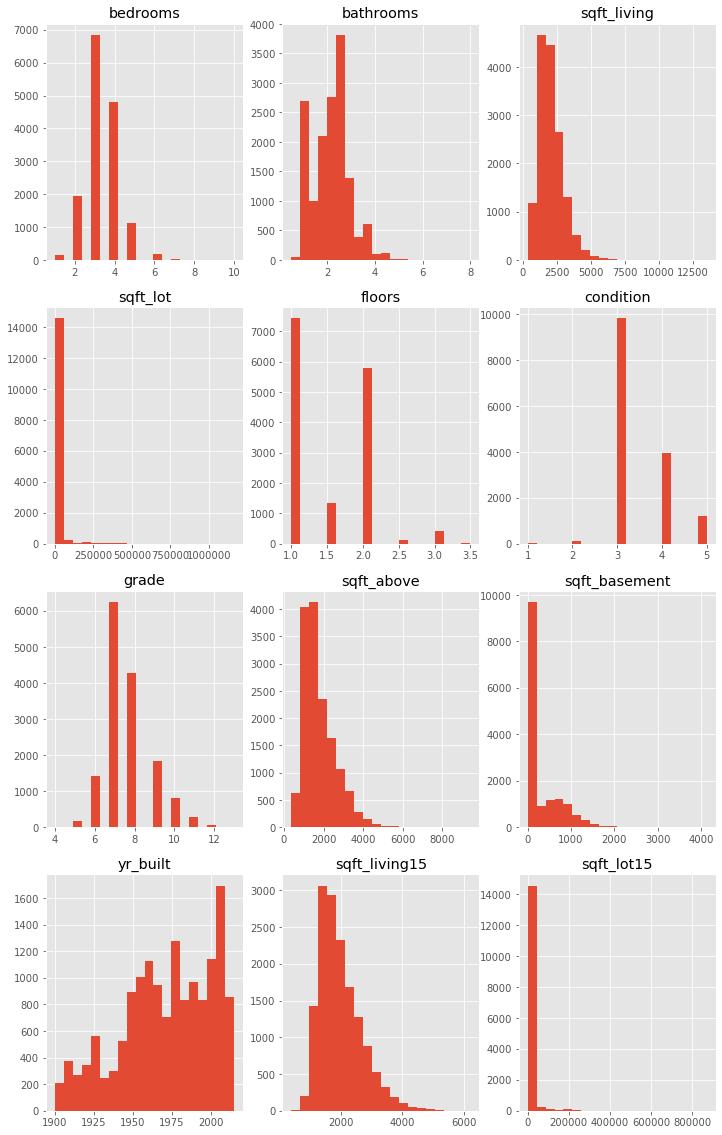

In [351]:
# let's look at the numeric variables.  Are they normally distributed?

numeric = ['bedrooms', 
       'bathrooms', 
       'sqft_living', 
       'sqft_lot', 
       'floors', 
       'condition', 
       'grade',
       'sqft_above', 
       'sqft_basement', 
       'yr_built',
       'sqft_living15', 
       'sqft_lot15'
             ]

num_cols = 3
if len(numeric)%num_cols == 0:
    num_rows = len(numeric)//num_cols
else:
    num_rows = (len(numeric)//num_cols)+1


fig, axs = plt.subplots(figsize=(12,20), nrows=num_rows, ncols=num_cols)


for feat in numeric:
    axs[numeric.index(feat)//num_cols, numeric.index(feat)%num_cols].hist(X_train[feat], bins=20)
    axs[numeric.index(feat)//num_cols, numeric.index(feat)%num_cols].set_title(feat)

In [352]:
# let's try to log these and see if they become more normal
# don't include features with zeros, like sqft_basement

non_zero = ['bedrooms', 
       'bathrooms', 
       'sqft_living', 
       'sqft_lot', 
       'floors', 
       'condition', 
       'grade',
       'sqft_above', 
       'yr_built',
       'sqft_living15', 
       'sqft_lot15'
             ]

X_train_logged = X_train.copy()

for feat in non_zero:
    X_train_logged[feat] = X_train_logged[feat].map(lambda x: np.log(x))


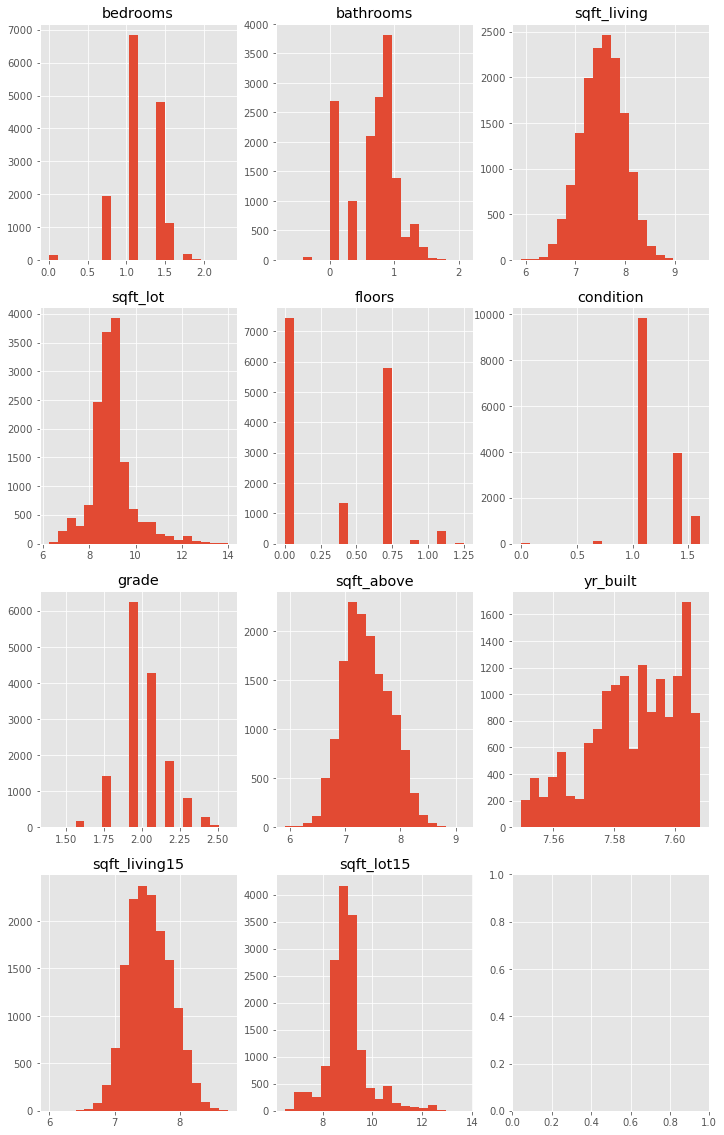

In [353]:
# Did it help?  Make more histograms

num_cols = 3
if len(non_zero)%num_cols == 0:
    num_rows = len(non_zero)//num_cols
else:
    num_rows = (len(non_zero)//num_cols)+1


fig, axs = plt.subplots(figsize=(12,20), nrows=num_rows, ncols=num_cols)


for feat in non_zero:
    axs[non_zero.index(feat)//num_cols, non_zero.index(feat)%num_cols].hist(X_train_logged[feat], bins=20)
    axs[non_zero.index(feat)//num_cols, non_zero.index(feat)%num_cols].set_title(feat)

In [354]:
# yeah, it kinda helped.  A bunch of things look more normal.
# like sqft_living, sqft_lot, grade, sqft_above, sqft_living15, sqft_lot15
# and to a lesser extent, bedrooms and grade too

In [355]:
# what if we build a model with just the above columns logged

# build a new X_train with just the above features logged

to_log = ['bedrooms', 
       'sqft_living', 
       'sqft_lot', 
       'grade',
       'sqft_above', 
       'sqft_living15', 
       'sqft_lot15'
             ]

X_train3 = X_train.copy()

for feat in to_log:
    X_train3[feat] = X_train3[feat].map(lambda x: np.log(x))
    
# log the test data

X_test3 = X_test.copy()

for feat in to_log:
    X_test3[feat] = X_test3[feat].map(lambda x: np.log(x))

In [411]:
# build a function to scale the X variables, and do a linear regression

def scale_lin_reg(X_train, y_train, X_test):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    linreg = LinearRegression()
    linreg.fit(X_train_scaled, y_train)

    y_train_pred = linreg.predict(X_train_scaled)
    y_test_pred = linreg.predict(X_test_scaled)
        
    return(y_train_pred, y_test_pred)

In [412]:
# let's scale and do a linear regression on the transformed data, to return y_train_pred and y_test_pred
# the inputs X_train3 and X_test3 have 7 features logged

y_train_pred3, y_test_pred3 = scale_lin_reg(X_train=X_train3, y_train=y_train, X_test=X_test3)

In [414]:
# now let's evaluate that model
evaluate_model(y_train=y_train, y_train_pred=y_train_pred3, y_test=y_test, y_test_pred=y_test_pred3)

Training Data 
 R-Squared: 0.600123 
 Mean Absolute Error: 143571.31 
 Root Mean Squared Error: 215401.12 

Testing Data 
 R-Squared: 0.591312 
 Mean Absolute Error: 141465.68 
 Root Mean Squared Error: 207923.01


In [359]:
# oh no!  It didn't help!

In [360]:
# these two features have the most improvement in normality after log transformations:
# sqft_living15
# sqft_lot15

# what if we just log these?

to_log = [
       'sqft_living15', 
       'sqft_lot15'
             ]

X_train4 = X_train.copy()

for feat in to_log:
    X_train4[feat] = X_train4[feat].map(lambda x: np.log(x))

# log the test data

X_test4 = X_test.copy()

for feat in to_log:
    X_test4[feat] = X_test4[feat].map(lambda x: np.log(x))

In [361]:
# let's scale and do a linear regression on the transformed data, to return y_train_pred and y_test_pred
# the inputs X_train4 and X_test4 have 2 features logged

y_train_pred4, y_test_pred4 = scale_lin_reg(X_train=X_train4, y_train=y_train, X_test=X_test4)

In [362]:
# evaluate the model

evaluate_model(y_train=y_train, y_train_pred=y_train_pred4, y_test=y_test, y_test_pred=y_test_pred4)

Training Data 
 R-Squared: 0.631542 
 Mean Absolute Error: 137340.68 
 Root Mean Squared Error: 206765.81 

Testing Data 
 R-Squared: 0.630779 
 Mean Absolute Error: 135352.0 
 Root Mean Squared Error: 197628.55


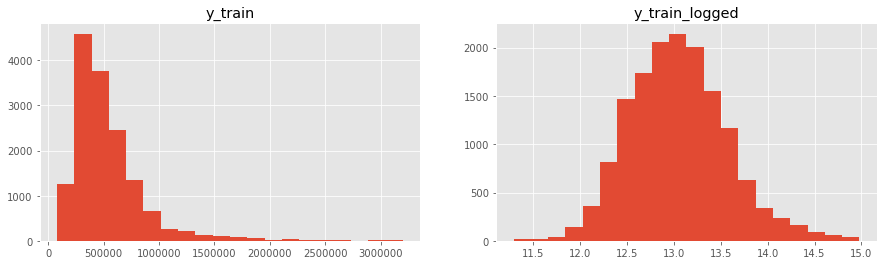

In [363]:
# That is a very slight improvement over the baseline model
# do we need to log the y as well?  Let's try

y_train_logged = y_train.copy()
y_train_logged = y_train_logged.map(lambda y: np.log1p(y))

fig, ax = plt.subplots(figsize = (15,4), nrows=1, ncols=2)

ax[0].hist(y_train, bins=20)
ax[0].set_title('y_train')

ax[1].hist(y_train_logged, bins=20)
ax[1].set_title('y_train_logged');

# the logged y_train definitely looks more normally distributed

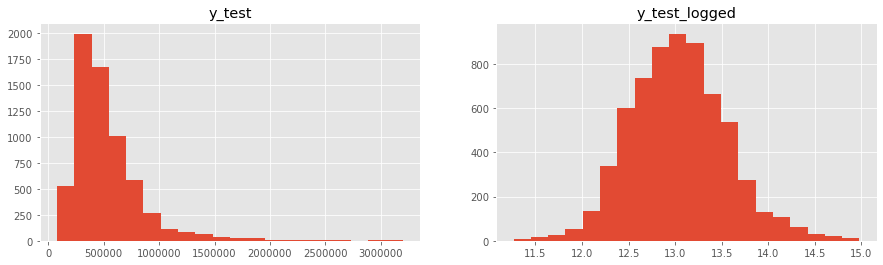

In [364]:
# log y_test as well

y_test_logged = y_test.copy()
y_test_logged = y_test_logged.map(lambda y: np.log1p(y))

fig, ax = plt.subplots(figsize = (15,4), nrows=1, ncols=2)

ax[0].hist(y_test, bins=20)
ax[0].set_title('y_test')

ax[1].hist(y_test_logged, bins=20)
ax[1].set_title('y_test_logged');

# the logged y_test looks more normally distributed too

In [365]:
# now let's run and evaluate the model with X_train4, X_test4, y_train_logged and y_test_logged

y_train_pred5, y_test_pred5 = scale_lin_reg(X_train=X_train4, y_train=y_train_logged, X_test=X_test4)

In [366]:
def eval_r2(y_train, y_train_pred, y_test, y_test_pred):

    # calculate r2 using logged target variable
    r2_train = round(r2_score(y_true=y_train, y_pred=y_train_pred), 6)
    r2_test = round(r2_score(y_true=y_test, y_pred=y_test_pred), 6)

    print('Training Data', '\n', 
          'R-Squared:', r2_train, '\n')
    
    print('Test Data', '\n', 
          'R-Squared:', r2_test)

In [367]:
eval_r2(y_train=y_train_logged, y_train_pred=y_train_pred5, y_test=y_test_logged, y_test_pred=y_test_pred5)

Training Data 
 R-Squared: 0.654136 

Test Data 
 R-Squared: 0.642119


In [368]:
# great, it helped a little, but need to unlog y_train_pred and y_test_pred to get price variance

def unlog_MAE_RMSE(y_train, y_train_logged_pred, y_test, y_test_logged_pred):
    
    # unlog target variable predictions to measure MAE and RMSE
    y_train_pred_exp = np.expm1(y_train_logged_pred)
    y_test_pred_exp = np.expm1(y_test_logged_pred)
    
    # check Mean Absolute Error
    mae_train = round(mean_absolute_error(y_true=y_train, y_pred=y_train_pred_exp), 2)
    mae_test = round(mean_absolute_error(y_true=y_test, y_pred=y_test_pred_exp), 2)

    # check Root Mean Squared Error
    rmse_train = round(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred_exp)), 2)
    rmse_test = round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred_exp)), 2)

    print('Training Data', '\n', 
          'Mean Absolute Error:', mae_train, '\n',
          'Root Mean Squared Error:', rmse_train, '\n')
    
    print('Test Data', '\n', 
          'Mean Absolute Error:', mae_test, '\n',
          'Root Mean Squared Error:', rmse_test, '\n')

In [369]:
unlog_MAE_RMSE(y_train=y_train, y_train_logged_pred=y_train_pred5, y_test=y_test, y_test_logged_pred=y_test_pred5)

Training Data 
 Mean Absolute Error: 129432.75 
 Root Mean Squared Error: 214795.91 

Test Data 
 Mean Absolute Error: 126991.03 
 Root Mean Squared Error: 193487.32 



In [370]:
# let's try to deal with zipcode
X_train6 = X_train4.copy() # use X_train4, which had two features logged

X_train6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15094 entries, 14289 to 15818
Data columns (total 14 columns):
bedrooms         15094 non-null int64
bathrooms        15094 non-null float64
sqft_living      15094 non-null int64
sqft_lot         15094 non-null int64
floors           15094 non-null float64
condition        15094 non-null int64
grade            15094 non-null int64
sqft_above       15094 non-null int64
sqft_basement    15094 non-null float64
yr_built         15094 non-null int64
zipcode          15094 non-null int64
sqft_living15    15094 non-null float64
sqft_lot15       15094 non-null float64
renovated        15094 non-null int64
dtypes: float64(5), int64(9)
memory usage: 1.7 MB


In [371]:
X_train6['zipcode'].value_counts().count() # 70 different zips
X_train6['zipcode'].value_counts()

# did a little research, 98112 seems to be an expensive neighborhood, at least in 2019
# also 98199 is up there
# https://www.seattlemet.com/home-and-real-estate/2019/03/the-top-12-neighborhoods-in-seattle-2019-edition

98103    416
98052    414
98115    412
98038    405
98042    386
98034    382
98117    382
98006    363
98118    350
98023    348
98133    341
98059    328
98058    324
98074    314
98033    308
98155    306
98125    292
98053    291
98056    285
98027    277
98092    260
98001    258
98075    254
98126    244
98144    239
98116    234
98106    232
98004    231
98029    228
98199    228
98065    221
98122    210
98003    203
98146    200
98168    196
98055    195
98112    194
98072    193
98008    191
98178    188
98198    188
98031    187
98028    184
98040    180
98136    178
98177    176
98107    173
98030    167
98166    160
98105    159
98022    157
98045    152
98011    144
98077    132
98119    132
98002    132
98019    128
98108    127
98005    111
98007     98
98188     92
98014     89
98032     84
98070     80
98109     80
98010     74
98102     71
98024     61
98148     42
98039     33
Name: zipcode, dtype: int64

In [372]:
zips=pd.concat([X_train6['zipcode'], pd.DataFrame(y_train)['price']], axis=1)

,zipcode,price
14289,98178,223000.00000
1078,98133,325000.00000
14957,98105,1020000.00000
2179,98004,1550000.00000
4133,98144,399950.00000
...,...,...
11303,98028,490000.00000
11983,98118,175000.00000
5400,98055,365000.00000
860,98168,245000.00000


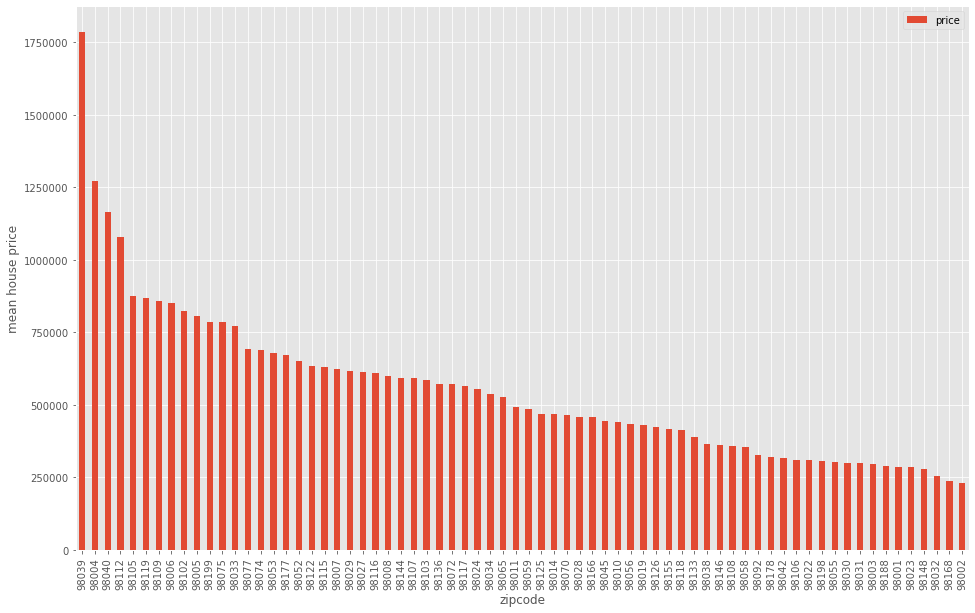

In [373]:
# sum price by zip to see if any stand out

zips_pivot = zips.pivot_table(values='price', index='zipcode', ).sort_values(by='price', ascending=False)
zips_pivot.plot(kind='bar', figsize=(16,10))
plt.ylabel('mean house price')
plt.legend;
# yes, some do stand out!  the top four, the bottom three
# what if I classified them based on price? I can make a dictionary

In [374]:
# create a dictionary of zip codes and classifications

ordered_zip_list = list(zips_pivot.index)
zip_dict = {}

# display all zips and index in price-ordered list for eyeballing

for i in ordered_zip_list:
    print(i, ordered_zip_list.index(i))

98039 0
98004 1
98040 2
98112 3
98105 4
98119 5
98109 6
98006 7
98102 8
98005 9
98199 10
98075 11
98033 12
98077 13
98074 14
98053 15
98177 16
98052 17
98122 18
98115 19
98007 20
98029 21
98027 22
98116 23
98008 24
98144 25
98107 26
98103 27
98136 28
98072 29
98117 30
98024 31
98034 32
98065 33
98011 34
98059 35
98125 36
98014 37
98070 38
98028 39
98166 40
98045 41
98010 42
98056 43
98019 44
98126 45
98155 46
98118 47
98133 48
98038 49
98146 50
98108 51
98058 52
98092 53
98178 54
98042 55
98106 56
98022 57
98198 58
98055 59
98030 60
98031 61
98003 62
98188 63
98001 64
98023 65
98148 66
98032 67
98168 68
98002 69


In [375]:
# classify zips in dict:

zip_dict[ordered_zip_list[0]] = 'Zip Class 1'

# make a function to add entries more easily
def add_to_zip_dict(list_index_start, list_index_stop, category):
    for i in ordered_zip_list[list_index_start:list_index_stop]:
        zip_dict[i] = category

add_to_zip_dict(1, 4, 'Zip Class 2')
add_to_zip_dict(4, 13, 'Zip Class 3')
add_to_zip_dict(13, 34, 'Zip Class 4')
add_to_zip_dict(34, 48, 'Zip Class 5')
add_to_zip_dict(48, 67, 'Zip Class 6')
add_to_zip_dict(67, 70, 'Zip Class 7')

zip_dict

{98039: 'Zip Class 1',
 98004: 'Zip Class 2',
 98040: 'Zip Class 2',
 98112: 'Zip Class 2',
 98105: 'Zip Class 3',
 98119: 'Zip Class 3',
 98109: 'Zip Class 3',
 98006: 'Zip Class 3',
 98102: 'Zip Class 3',
 98005: 'Zip Class 3',
 98199: 'Zip Class 3',
 98075: 'Zip Class 3',
 98033: 'Zip Class 3',
 98077: 'Zip Class 4',
 98074: 'Zip Class 4',
 98053: 'Zip Class 4',
 98177: 'Zip Class 4',
 98052: 'Zip Class 4',
 98122: 'Zip Class 4',
 98115: 'Zip Class 4',
 98007: 'Zip Class 4',
 98029: 'Zip Class 4',
 98027: 'Zip Class 4',
 98116: 'Zip Class 4',
 98008: 'Zip Class 4',
 98144: 'Zip Class 4',
 98107: 'Zip Class 4',
 98103: 'Zip Class 4',
 98136: 'Zip Class 4',
 98072: 'Zip Class 4',
 98117: 'Zip Class 4',
 98024: 'Zip Class 4',
 98034: 'Zip Class 4',
 98065: 'Zip Class 4',
 98011: 'Zip Class 5',
 98059: 'Zip Class 5',
 98125: 'Zip Class 5',
 98014: 'Zip Class 5',
 98070: 'Zip Class 5',
 98028: 'Zip Class 5',
 98166: 'Zip Class 5',
 98045: 'Zip Class 5',
 98010: 'Zip Class 5',
 98056: 'Zi

In [376]:
# add classification column to training data, and drop original zip column

X_train6['zip_class'] = X_train6['zipcode'].map(lambda x: zip_dict[x])
X_train6

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,zip_class
14289,3,2.00000,1310,8440,1.00000,5,6,1310,0.00000,1951,98178,7.48997,9.28498,0,Zip Class 6
1078,3,1.00000,1040,7541,1.00000,3,6,1040,0.00000,1951,98133,7.03878,8.71604,0,Zip Class 6
14957,4,3.00000,2720,4800,1.50000,5,8,1790,930.00000,1928,98105,7.72312,8.47637,0,Zip Class 3
2179,5,2.50000,2450,20805,2.00000,4,9,2450,0.00000,1963,98004,8.01301,9.91956,0,Zip Class 2
4133,3,2.50000,1610,1320,2.00000,3,7,1280,330.00000,2007,98144,7.29980,7.37901,0,Zip Class 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,4,2.50000,2242,37451,2.00000,3,8,2242,0.00000,1995,98028,7.71512,9.48227,0,Zip Class 5
11983,3,1.75000,1430,4920,1.00000,2,6,1430,0.00000,1957,98118,7.34601,8.63870,0,Zip Class 5
5400,4,3.50000,2720,6781,2.00000,3,8,2100,620.00000,1999,98055,7.73193,8.68980,0,Zip Class 6
860,1,0.75000,380,15000,1.00000,3,5,380,0.00000,1963,98168,7.06476,9.61581,0,Zip Class 7


In [377]:
# one hot encode classification column

zip_class_columns = pd.get_dummies(X_train6['zip_class'], drop_first=True)
zip_class_columns

X_train6 = pd.concat([X_train6, zip_class_columns], axis=1)
X_train6.drop(columns=['zipcode','zip_class'], inplace=True)

In [378]:
# add same features to test set

X_test6 = X_test4
X_test6['zip_class'] = X_test6['zipcode'].map(lambda x: zip_dict[x])

zip_class_columns = pd.get_dummies(X_test6['zip_class'], drop_first=True)
X_test6 = pd.concat([X_test6, zip_class_columns], axis=1)
X_test6.drop(columns=['zipcode','zip_class'], inplace=True)

In [379]:
X_train6 #looks good
X_test6 #looks good

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,renovated,Zip Class 2,Zip Class 3,Zip Class 4,Zip Class 5,Zip Class 6,Zip Class 7
8742,3,2.50000,1260,1125,3.00000,3,8,1260,0.00000,2002,7.21524,7.13090,0,0,0,1,0,0,0
5170,3,1.75000,1530,8800,1.00000,4,7,1040,490.00000,1967,7.33302,9.06993,0,0,0,0,0,1,0
8304,5,2.00000,2300,7897,2.50000,4,8,2300,0.00000,1956,7.61579,8.97487,0,0,0,0,0,1,0
10599,2,2.25000,1290,1334,3.00000,3,8,1290,0.00000,2007,7.20786,7.19594,0,0,0,1,0,0,0
21212,3,2.00000,1680,5246,1.00000,3,7,1680,0.00000,2007,7.79565,8.83681,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20730,3,2.50000,2424,6143,2.00000,3,9,2424,0.00000,2014,7.77528,8.70550,0,0,0,0,0,1,0
12013,4,2.00000,3210,8400,1.50000,5,7,2040,1170.00000,1914,7.83992,8.77307,0,0,0,1,0,0,0
5234,3,1.50000,1520,7123,1.00000,4,7,1520,0.00000,1959,7.27932,8.99007,0,0,0,0,1,0,0
15268,3,1.00000,1060,9506,1.00000,3,7,1060,0.00000,1959,7.32647,9.04417,0,0,0,0,1,0,0


In [380]:
y_train_pred6, y_test_pred6 = scale_lin_reg(X_train=X_train6, y_train=y_train_logged, X_test=X_test6)

In [382]:
eval_r2(y_train=y_train_logged, y_train_pred=y_train_pred6, y_test=y_test_logged, y_test_pred=y_test_pred6)

Training Data 
 R-Squared: 0.825709 

Test Data 
 R-Squared: 0.81822


In [383]:
# to evaluate MAE and RMSE, unlog y_train_pred6 and y_test_pred6
unlog_MAE_RMSE(y_train=y_train, y_train_logged_pred=y_train_pred6, y_test=y_test, y_test_logged_pred=y_test_pred6)

Training Data 
 Mean Absolute Error: 91068.69 
 Root Mean Squared Error: 171202.89 

Test Data 
 Mean Absolute Error: 88264.01 
 Root Mean Squared Error: 144804.66 



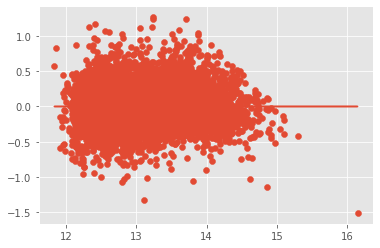

In [384]:
# let's look at the training set residuals:

residuals_train6 = y_train_logged-y_train_pred6
plt.scatter(y_train_pred6, residuals_train6)
plt.plot(y_train_pred6, [0 for i in range(len(y_train_pred6))]);

# still showing some outliers
# let's try removing the top 20 price outliers

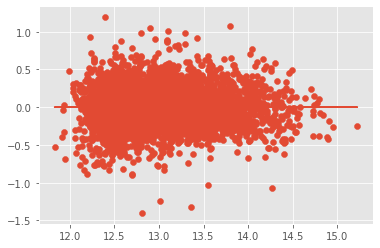

In [385]:
# and test set residuals:

residuals_test6 = y_test_logged-y_test_pred6
plt.scatter(y_test_pred6, residuals_test6)
plt.plot(y_test_pred6, [0 for i in range(len(y_test_pred6))]);

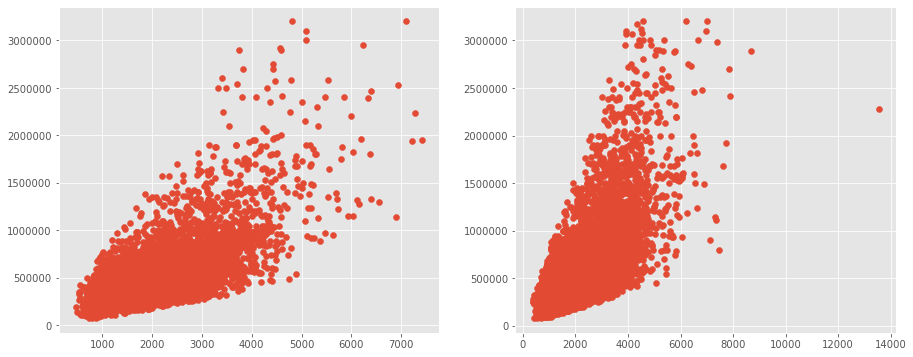

In [429]:
plt.subplots(figsize=(15,6));

ax1 = plt.subplot(121)
plt.scatter(X_test6['sqft_living'], y_test)

ax2 = plt.subplot(122)
plt.scatter(X_train6['sqft_living'], y_train)

In [418]:
# look at coefficients

model = sm.OLS(y_train_logged, sm.add_constant(pd.DataFrame(X_train6, columns=X_train6.columns, index=X_train6.index)))
results = model.fit()

results.summary()

# sqft_above and sqft_basement have high p-values

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     3759.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:21:38   Log-Likelihood:                 1590.4
No. Observations:               15094   AIC:                            -3141.
Df Residuals:                   15074   BIC:                            -2988.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.0467      0.177     96.400      0.000      16.700      17.393
bedrooms         -0.0144      0.003     -5.655      0.000      -0.019      -0.009
bathrooms         0.0523      0.004     12.274      0.000       0.044       0.061
sqft_living       0.0002   2.46e-05      6.593      0.000       0.000       0.000
sqft_lot       6.254e-07   5.28e-08     11.836      0.000    5.22e-07    7.29e-07
floors            0.0284      0.005      5.655      0.000       0.019       0.038
condition         0.0433      0.003     14.344      0.000       0.037       0.049
grade             0.1245      0.003     44.497      0.000       0.119       0.130
sqft_above     4.739e-06   2.45e-05      0.194      0.846   -4.32e-05    5.27e-05
sqft_basement   2.04e-05   2.43e-05      0.840      0.401   -2.72e-05     6.8e-05
yr_built         -0.0029   8.75e-05    -32.916      0.000      -0.003      -0.003
sqft_living15     0.1568      0.009     17.483      0.000       0.139       0.174
sqft_lot15       -0.0312      0.003     -9.461      0.000      -0.038      -0.025
renovated         0.0601      0.010      5.793      0.000       0.040       0.080
Zip Class 2      -0.2881      0.039     -7.382      0.000      -0.365      -0.212
Zip Class 3      -0.5227      0.038    -13.609      0.000      -0.598      -0.447
Zip Class 4      -0.6330      0.038    -16.557      0.000      -0.708      -0.558
Zip Class 5      -0.8419      0.038    -21.932      0.000      -0.917      -0.767
Zip Class 6      -1.0994      0.038    -28.680      0.000      -1.175      -1.024
Zip Class 7      -1.2441      0.040    -31.292      0.000      -1.322      -1.166
==============================================================================
Omnibus:                      855.529   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3151.321
Skew:                           0.171   Prob(JB):                         0.00
Kurtosis:                       5.212   Cond. No.                     4.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# let's see if removing multicolinearity helps
# find top correlations
# code from Flatiron Data Science course's Multicollinearity Lab

df=X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df[(df.cc>.75) & (df.cc <1)]

# as expected, high correlations among these five variables
# let's drop sqft_living and see what happens

In [ ]:
# iterate thru combinations of highly correlated variables to see if dropping them increases r2

correlated = ['sqft_living',
              'sqft_above',
              'grade',
              'bathrooms',
              'sqft_living15']

combs_list=[]

for n in range(1,5):
    
    comb = combinations(correlated,n)
    combs_list = combs_list + list(comb)
    
combs_list

for c in combs_list: 
    print(c)
    X_train7 = X_train6.drop(columns = list(c))
    X_test7 = X_test6.drop(columns = list(c))
    y_train_pred7, y_test_pred7 = scale_lin_reg(X_train=X_train7, y_train=y_train_logged, X_test=X_test7)
    eval_r2(y_train=y_train_logged, y_train_pred=y_train_pred7, y_test=y_test_logged, y_test_pred=y_test_pred7)
    print('\n')

# despite the multicolinearity, dropping combinations of these columns does not result in an improved R2

In [ ]:
end notebook here??

In [ ]:
# instead of having the year renovated and the year built, 
# would it help to have a column for built or renovated in the past 10 or 20 years?

# let's look at these columns vs mean price
data_renov = pd.read_csv('data/kc_house_data.csv') # I already removed yr_renovated, so import data again

# first look at yr_renovated
renov_pivot = data_renov.pivot_table(values='price', index='yr_renovated', ).sort_values(by='yr_renovated')
renov_pivot.plot(kind='bar', figsize=(16,10))
plt.ylabel('mean house price')
plt.legend;

# this is hard to interpret, but it looks like the last 20 years could be a predictor

In [ ]:
# now look at yr_built
built_pivot = data_renov.pivot_table(values='price', index='yr_built', ).sort_values(by='yr_built')
built_pivot.plot(kind='bar', figsize=(16,10))
plt.ylabel('mean house price')
plt.legend;

# hmmm, almost looks like older homes and new homes are highly valued, while homes in the middle are not
# should I have only looked at testing data for this?

In [ ]:
# actually it seems these should be separate columns
# one for renovated in the past 20 years, and one segmenting the year built

In [ ]:
# let's make a binary column showing homes renovated in the last 20 years
# since the sale dates are from different years,
# the new column should look at the difference between year sold and year renovated

data_renov['date'].value_counts() 
type(data['date'][0]) # sale dates are strings, must convert to dates

# create a new column for year sold
data_renov['yr_sold'] = pd.to_datetime(data_renov['date']).dt.year
data_renov['yr_sold'].value_counts() # sale dates are from 2014 and 2015

# create a new column showing homes renovated in the last 20 years
data_renov['renov_20_yrs'] = np.where(data_renov['yr_sold']-data_renov['yr_renovated'] < 20, 1, 0)
data_renov['renov_20_yrs'].value_counts() # only 440 homes renovated in last 20 years


In [ ]:
# create a dictionary of years, showing the corresponding categories

years_list = list(built_pivot.index)
years_dict = {}

for i in years_list[0:41]:
    years_dict[i] = 'pre-war'
    
for i in years_list[41:88]:
    years_dict[i] = 'mid-century'

for i in years_list[88:117]:
    years_dict[i] = 'recent'
    
years_dict

In [ ]:
# add a column with yr_built categories

data_renov['built_cat'] = data_renov['yr_built'].map(lambda x: years_dict[x])
data_renov

In [ ]:
# one hot encode classification column

built_cat_columns = pd.get_dummies(data_renov['built_cat'], drop_first=True)
built_cat_columns

data_renov = pd.concat([data_renov, built_cat_columns], axis=1)
data_renov.drop(columns=['yr_built','built_cat'], inplace=True)

In [ ]:
data_renov

In [ ]:
# now we just have to stick these columns back onto the training and test sets

#training set first
X_train9 = X_train8.copy()
columns_to_add = data_renov[['renov_20_yrs', 'pre-war', 'recent']]
X_train9 = pd.concat([X_train9, columns_to_add], axis=1, join='inner')
X_train9 # looks good

# now do test set
X_test9 = X_test8.copy()
X_test9 = pd.concat([X_test9, columns_to_add], axis=1, join='inner')
X_test9 # looks good

# now drop the old renovated and yr_built columns
X_train9.drop(columns=['renovated', 'yr_built'], inplace=True)
X_test9.drop(columns=['renovated', 'yr_built'], inplace=True)

X_train9 # looks good
X_test9 # looks good

In [ ]:
# let's test model 9!

scaler9 = StandardScaler()
X_train9_scaled = scaler9.fit_transform(X_train9)

# scale the test data

X_test9_scaled = scaler9.transform(X_test9)

# now predict the test outcomes and get the r2 and RMSE scores

linreg9 = LinearRegression()
linreg9.fit(X_train9_scaled, y_train)

y_hat_train9 = linreg9.predict(X_train9_scaled)
y_hat_test9 = linreg9.predict(X_test9_scaled)

r2_train9 = round(r2_score(y_true=y_train, y_pred=y_hat_train9), 2)
r2_test9 = round(r2_score(y_true=y_test, y_pred=y_hat_test9), 2)

rmse_train9 = round(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_hat_train9)), 2)
rmse_test9 = round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat_test9)), 2)

print('\n', 'Training Data', '\n', 
      'R-Squared:', r2_train9, '\n',
      'Root Mean Squared Error:', rmse_train8,)

print('\n',
      'Testing Data', '\n', 
      'R-Squared:', r2_test9, '\n',
      'Root Mean Squared Error:', rmse_test9)

In [ ]:
# NOTHING?!  REALLY?

# check p-values in Statsmodels
# should I be dropping the variables with high p-values?

model = sm.OLS(y_train, X_train9, hasconst=True)
results = model.fit()

results.summary()

In [ ]:
# future tweaks

# use automated feature selection methods?

# use min/max scalar for binary columns? - not a hard and fast rule but maybe will help
# model with just continuous? - didn't work

# look for interactions?
# try different train/test splits
# look at month sold?
# if model predicts something, e.g. over a million, go to a different model?